## Calefacció constant

Considerem ara l'evolució de la temperatura d'un habitatge amb una temperatura ambient variable
$$T_e(t) = \frac{1}{2}(T_\text{max} + T_\text{min}) + \frac{1}{2}(T_\text{max} - T_\text{min})\sin{\omega t} $$
i $$q(t) = q$$

In [2]:
T_max = 20
T_min = 8
w = pi/12
k = 0.1
var('T_0, q')
T_e(t) = 0.5*(T_max + T_min) + 0.5*(T_max - T_min)*sin(w*t)

In [12]:
x = function('T')(t)
eq1 = diff(x,t) == q - k*(x - T_e(t))
T_1(t) = desolve(eq1, x, ivar = t, ics = [0,T_0])
show(T_1(t))

(180*pi - 180*pi*cos(1/12*pi*t)*e^(1/10*t) - 350*pi^2 + (25*pi^2 + 36)*T_0 - 10*(25*pi^2 + 36)*q + 2*(175*pi^2 + 5*(25*pi^2 + 36)*q + 252)*e^(1/10*t) + 216*e^(1/10*t)*sin(1/12*pi*t) - 504)*e^(-1/10*t)/(25*pi^2 + 36)

In [17]:
q1(t) = 22*k - k*(T_max + T_min)/2 + k**2*(T_max - T_min)/(2*sqrt(k**2 + w**2))
show(q1(1).n())

1.01409611638026

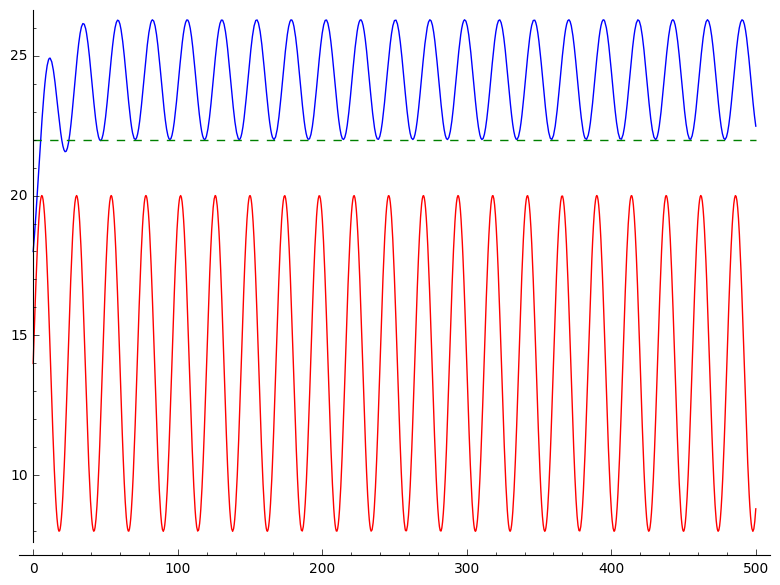

In [14]:
plot(T_1.subs(q = q1(0), T_0 = 18), xmin = 0, xmax = 500) \
+ plot(T_e, xmin = 0, xmax = 500, color = 'red') \
+ plot(22, xmin = 0, xmax = 500, color = 'green', linestyle = '--')

## Anul·lar fluctuacions

In [19]:
q2(t) = k*22-k*T_e(t)
y = function('T')(t)
eq2 = diff(y,t) == q2(t) - k*(y - T_e(t))
T_2(t) = desolve(eq2, y, ivar = t, ics = [0,T_0])
show(T_2)

t |--> (T_0 + 22*e^(1/10*t) - 22)*e^(-1/10*t)

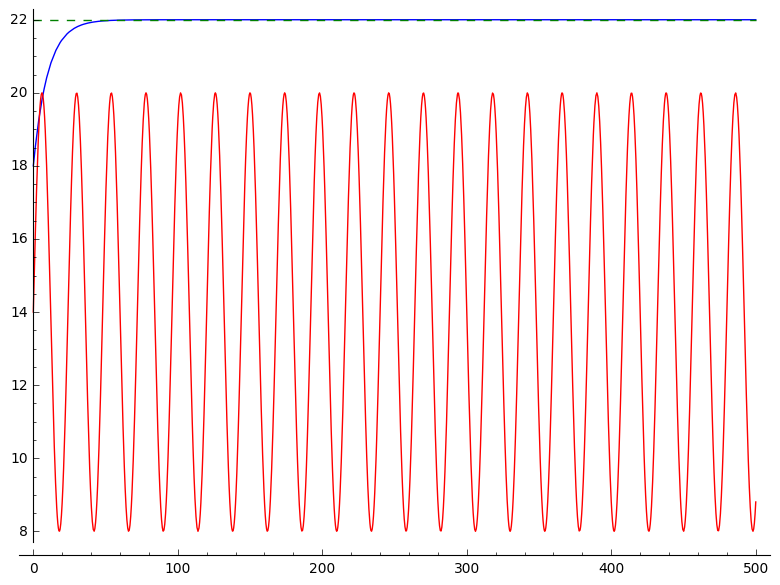

In [24]:
plot(T_2.subs(T_0 = 18), xmin = 0, xmax = 500) \
+ plot(T_e, xmin = 0, xmax = 500, color = 'red') \
+ plot(22, xmin = 0, xmax = 500, color = 'green', linestyle = '--')

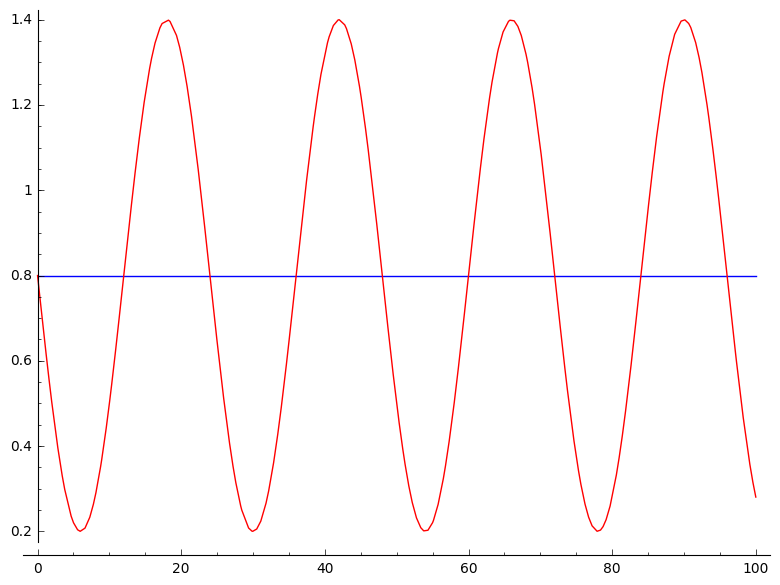

In [8]:
plot(q1, xmin = 0, xmax = 100) + plot(q2, xmin = 0, xmax = 100, color = 'red')

## Heaviside

In [52]:
T_max = 20
T_min = 8
w = pi/12
k = 0.1
var('T')
T_e(t) = 0.5*(T_max + T_min) + 0.5*(T_max - T_min)*sin(w*t)
eq4(T,t) = unit_step(20 - T) - k*(T - T_e(t))
ts = srange(0,12.1,0.5)
resultat = desolve_odeint(eq4(T, t), 22, ts, T, ivar = t)
punts = zip(ts,resultat[:,0])

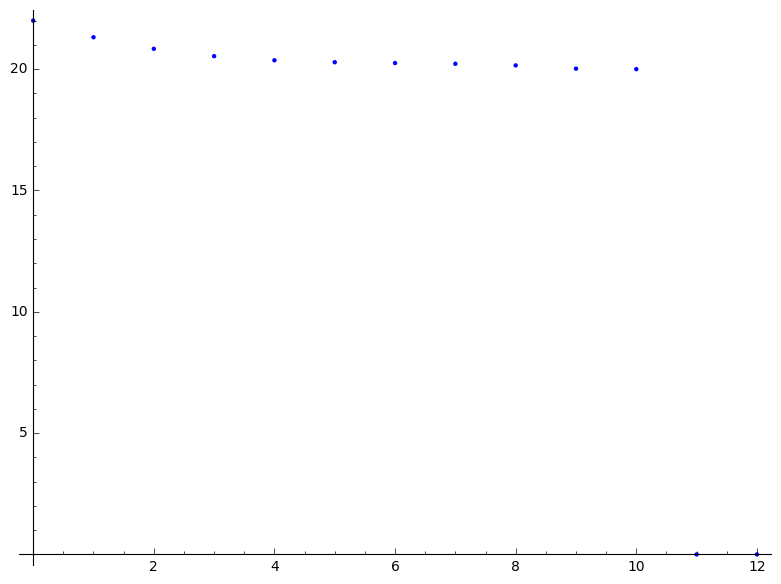

In [51]:
list_plot(punts)

In [108]:
T_max = 20
T_min = 8
w = pi/12
k = 0.1
T_e(t) = 0.5*(T_max + T_min) + 0.5*(T_max - T_min)*sin(w*t)
x = function('T')(t)
eq4 = diff(x,t) == 1.1*unit_step(22 - x) - k*(x - T_e(t))
punts = desolve_rk4(eq4, x, ivar = t, ics = [0,18], end_points = 240, step = 0.01)

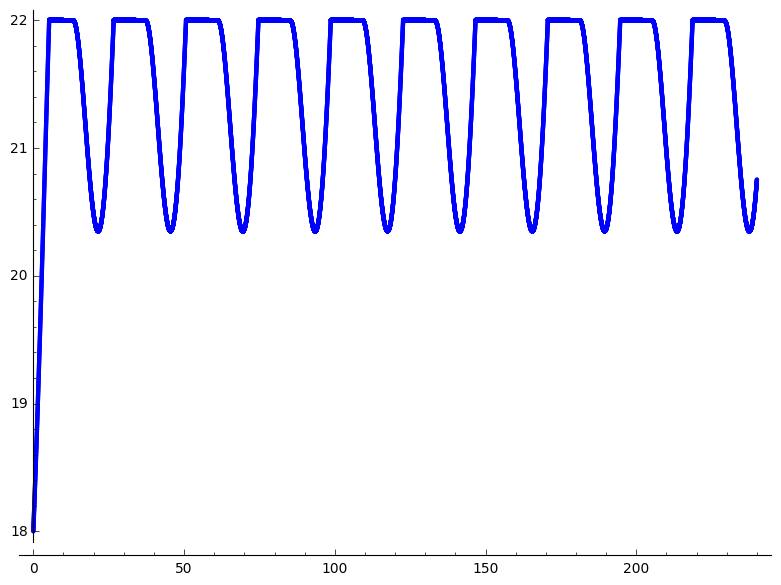

In [107]:
list_plot(punts)

In [104]:
fitxer1 = open("punts1.dat", "w")

In [105]:
for x in punts:
    fitxer.write("{}\t{}\n".format(x[0], x[1]))

In [113]:
fitxer2 = open("calors.dat", "w")

In [112]:
calors = map(lambda x: [x[0], unit_step(22 - x[1])], punts)
calors

[[0, 1],
 [0.01, 1],
 [0.02, 1],
 [0.03, 1],
 [0.04, 1],
 [0.05, 1],
 [0.06, 1],
 [0.07, 1],
 [0.08, 1],
 [0.09, 1],
 [0.1, 1],
 [0.11, 1],
 [0.12, 1],
 [0.13, 1],
 [0.14, 1],
 [0.15, 1],
 [0.16, 1],
 [0.17, 1],
 [0.18, 1],
 [0.19, 1],
 [0.2, 1],
 [0.21, 1],
 [0.22, 1],
 [0.23, 1],
 [0.24, 1],
 [0.25, 1],
 [0.26, 1],
 [0.27, 1],
 [0.28, 1],
 [0.29, 1],
 [0.3, 1],
 [0.31, 1],
 [0.32, 1],
 [0.33, 1],
 [0.34, 1],
 [0.35, 1],
 [0.36, 1],
 [0.37, 1],
 [0.38, 1],
 [0.39, 1],
 [0.4, 1],
 [0.41, 1],
 [0.42, 1],
 [0.43, 1],
 [0.44, 1],
 [0.45, 1],
 [0.46, 1],
 [0.47, 1],
 [0.48, 1],
 [0.49, 1],
 [0.5, 1],
 [0.51, 1],
 [0.52, 1],
 [0.53, 1],
 [0.54, 1],
 [0.55, 1],
 [0.56, 1],
 [0.5700000000000001, 1],
 [0.58, 1],
 [0.59, 1],
 [0.6, 1],
 [0.61, 1],
 [0.62, 1],
 [0.63, 1],
 [0.64, 1],
 [0.65, 1],
 [0.66, 1],
 [0.67, 1],
 [0.68, 1],
 [0.6900000000000001, 1],
 [0.7000000000000001, 1],
 [0.71, 1],
 [0.72, 1],
 [0.73, 1],
 [0.74, 1],
 [0.75, 1],
 [0.76, 1],
 [0.77, 1],
 [0.78, 1],
 [0.79, 1],
 [0.8, 

In [114]:
for x in calors:
    fitxer2.write("{}\t{}\n".format(x[0], x[1]))